In [6]:
import numpy as np
import matplotlib.pyplot as plt

Посчитаем моменты в общем случае
$$
\int_{\gamma_1}^{\gamma2} p(x) f(x) d x 
$$
Введем замену переменной $x = b - t$.
Тогда задача сведется к следующей.
$$
\int_{\gamma_2 - b}^{\gamma_1 - b} p(b - t) f(b - t) d t = \int_{\gamma_2 - b}^{\gamma_1 - b} \tilde p(t) f(b - t) d t \approx \sum_{i=1}^{n} A_{i} f\left(b - t_{i}\right)
$$
где $\tilde p(t) =  t^{-\frac{1}{4}}$. Тогда
$$\mu_i = \int_{\gamma_2 - b}^{\gamma_1 - b} t^{-\frac{1}{4}} \cdot t^{i} dt = \frac{1}{i+1-\frac{1}{4}}x^{i+1-\frac{1}{4}} \bigg|^{b - \gamma_1}_{b - \gamma_2}$$


In [7]:
def moment(gamma1, gamma2, k):
    b = 3.2
    coef = k + 1 - 1/4
    return 1 / coef * ((b - gamma1) ** coef - (b - gamma2) ** coef)

In [8]:
# Инициализируем функцию
def f(x, a=1.7, b=3.2, alpha=0, beta=0.25):
    return 3 * np.cos(2 * x) * np.exp(2 * x / 3) + 5 * np.sin(2.5 * x) * np.exp(-x / 3) + 2 * x

def part_newton_cotes(f, gamma1=1.7, gamma2=3.2, n_points=5, b=3.2, return_info=False):
    x = np.linspace(gamma1, gamma2, n_points)
    
    # Замена
    t = b - x
    
    # Строим матрицу Вандермонда
    Q = np.ones((len(x), len(x)))
    for i in range(1, len(x)):
        Q[:, i] = Q[:, i - 1] * t
    
    # Находим моменты
    mu = np.array([moment(gamma1, gamma2, k) for k in range(len(x))])
    
    # Решаем систему
    A = np.linalg.solve(Q.T, mu)
    
    # Считаем сумму
    integral = sum(A * f(x))
    
    if return_info is True:
        return {"mu": mu, "A": A, "S": integral}
    
    return integral

In [9]:
# Считаем разные показатели
n = 50
sum_abs_A = np.zeros(n)
sum_A = np.zeros(n)
mu0 = np.zeros(n)
integral = np.zeros(n)

for i in range(1, n):
    info = part_newton_cotes(f, n_points=i, return_info=True)
    sum_abs_A[i] = np.linalg.norm(info["A"], 1)
    sum_A[i] = sum(info["A"])
    mu0[i] = info["mu"][0]
    integral[i] = info["S"]

In [10]:
# Функция для графиков 
def plot(title, y):
    fig = plt.figure()
    plt.figure(figsize=(16,6), dpi= 80)
    plt.title(title, fontsize=17)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)
    plt.grid(axis='both', alpha=.3)

    plt.plot([i for i in range(n)], y, color='tab:red');
    plt.show();

<Figure size 432x288 with 0 Axes>

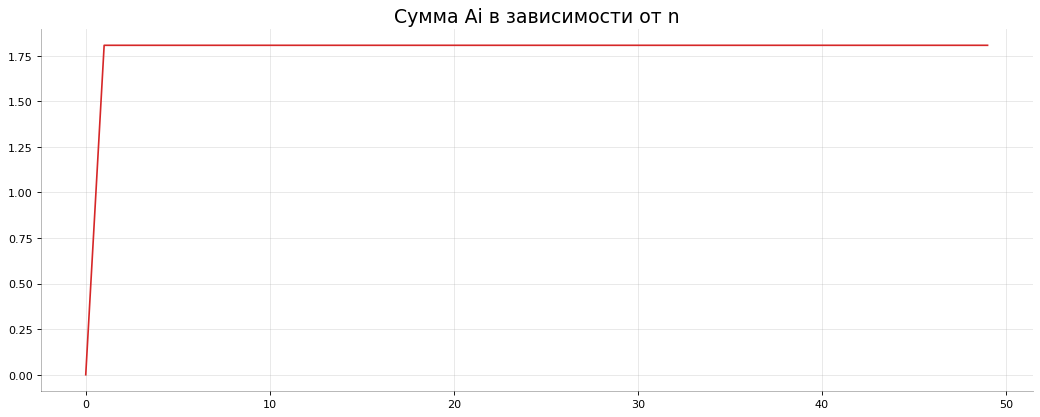

<Figure size 432x288 with 0 Axes>

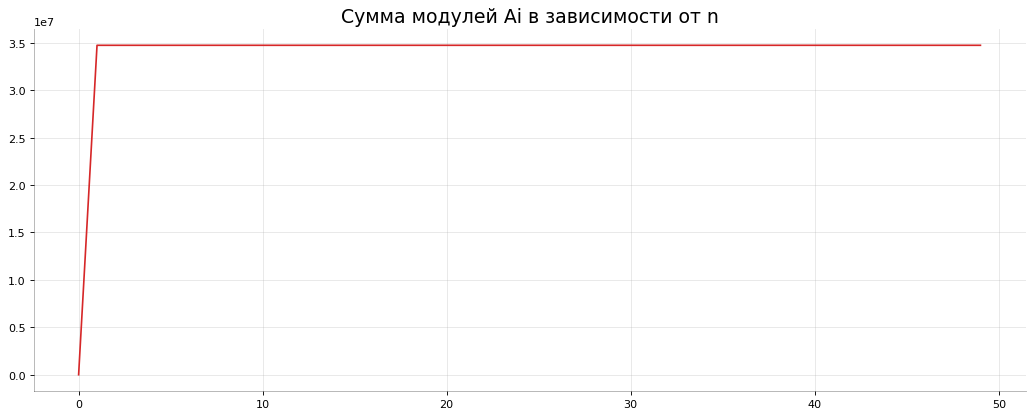

<Figure size 432x288 with 0 Axes>

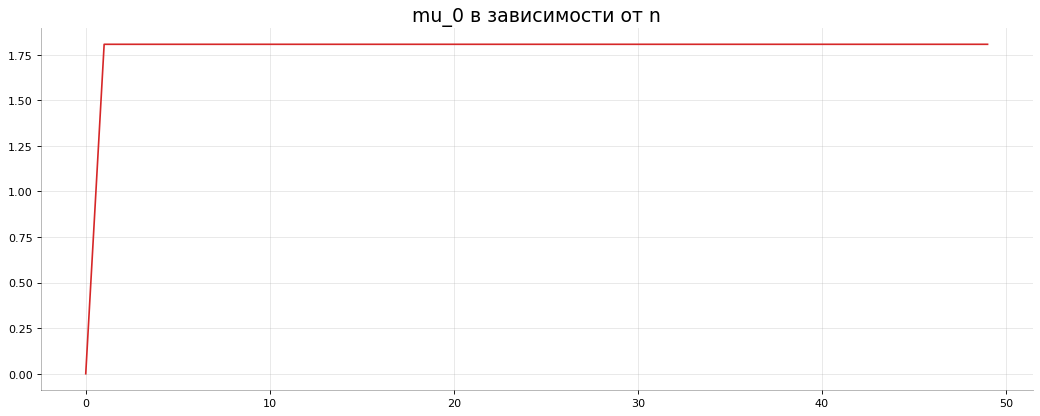

<Figure size 432x288 with 0 Axes>

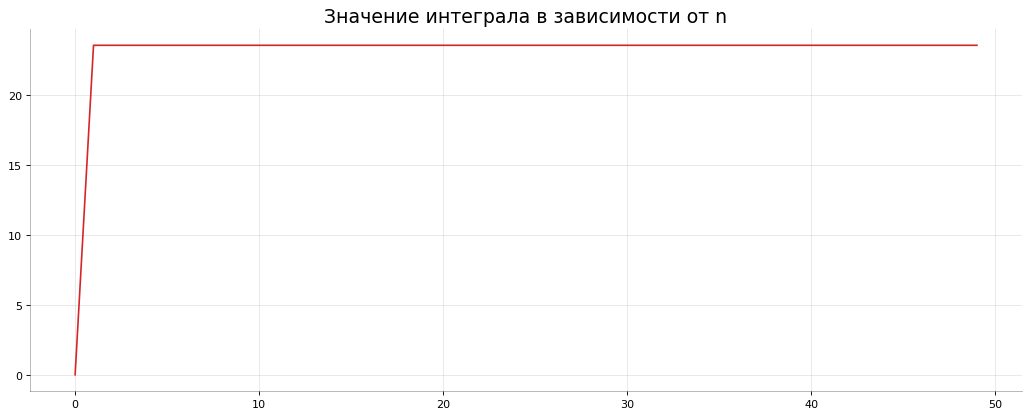

In [11]:
plot("Сумма Ai в зависимости от n", sum_A);
plot("Сумма модулей Ai в зависимости от n", sum_abs_A);
plot("mu_0 в зависимости от n", mu0);
plot("Значение интеграла в зависимости от n", integral);

Можем сделать вывод, что важно использовать небольшие значения n. Например, от 4 до 10.. Так как как сумма модулей А растет, а само А остается на том же уровне, можно сказать, что у нас появляются отрицательные значения А. И так как оценка погрешности квадратурной формы Ньютона-Котеса оценивается с помощью величины, зависящей от $\sum_i|A_i|$, то лучше, если бы она была небольшой

In [14]:
# Составная квадратурная формула
def quad(f, a=1.7, b=3.2, method="newton_cotes", n_parts=10, n_points=10):
    if method == "newton_cotes":
        method = part_newton_cotes
    
    # Разбиваем на интервалы
    intervals = np.linspace(a, b, n_parts)
    integral = 0
    for i in range(1, len(intervals)):
        # На каждом интервале применяем заданную квадратурную форму 
        integral += method(f, intervals[i - 1], intervals[i], n_points=n_points)
        
    return integral

In [15]:
quad(f)

23.5766553840256